# Laboratorio 2
#### Agustina Guzmán

### 3.1 Carga y exploración de datos

Se necesitaran las siguientes librerias y funciones

In [307]:
!pip3 install pandas # Se instala la libreria pandas
!pip3 install matplotlib #Se instala la libreria matplotlib


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip


In [308]:
import pandas as pd #Importacion de la libreria pandas
import numpy as np #Importacion de la libreria NumPy
import matplotlib as mpl #Importacion de la libreria matplotlib
import matplotlib.pyplot as plt #Importacion de la coleccion de funciones matplotlib.pyplot
from IPython.display import display #Importacion de display de IPython.display. Sirve para mostrar más de un elemento por celda de Jupyter

**Store**

In [309]:
df_store = pd.read_csv("store_data.csv", index_col=0)
display(df_store.head(10))

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0
5,6,a,a,310.0,0
6,7,a,c,24000.0,0
7,8,a,a,7520.0,0
8,9,a,c,2030.0,0
9,10,a,a,3160.0,0


In [310]:
df_store.dtypes

Store                    int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
dtype: object

dtypes nos entrega el tipo de dato de cada columna. En este caso, Store y Promo 2 son numeros enteros, CompetitionDistance numeros reales y StoreType y Assortment objetos.
Funcion de 
https://aprendeia.com/explorando-los-datos-con-python/

In [311]:
df_store.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1112.000000,1115.000000
mean,558.00000,5404.901079,0.512108
std,322.01708,7663.174720,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,717.500000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6882.500000,1.000000
max,1115.00000,75860.000000,1.000000


CompetitionDistance: El minimo y el maximo son 20 y 758960, respectivamente, mientras que el 75% de los datos estan entre 717.5 y 6882.5, por lo tanto la distribucion de estos datos es muy dispersa, y se esperan valores muy por fuera del rango intercuartil.

In [312]:
store_type = df_store["StoreType"]
store_type.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

La mayoria de las tiendas son de tipo "a", y la minoria de tipo "b"

In [313]:
assortment = df_store["Assortment"]
assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

Las cantidades de tiendas con variedad de productos "a" y "c" son similares, mucho mayores que la cantidad de tiendas con variedad de productos "b"

In [314]:
promo = df_store["Promo2"]
promo.value_counts()

1    571
0    544
Name: Promo2, dtype: int64

Hay una cantidad similar de tiendas con y sin promocion

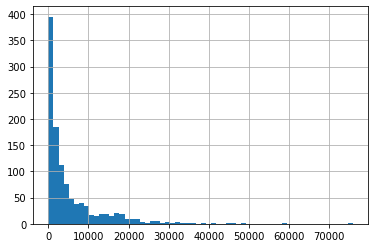

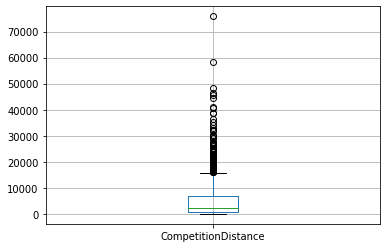

In [315]:
df_store["CompetitionDistance"].hist(bins=60)
plt.show()
df_store.boxplot(column = "CompetitionDistance")
plt.show()

En el primer grafico que corresponde a un histograma se puede observar la presencia de algunos valores extremos, lo que se ve mas claro en el segundo grafico, un box plot. 

Para analizar sin hay alguna relacion entre los valores extremos y alguna caracteristica, se haran tres box plots diferentes.

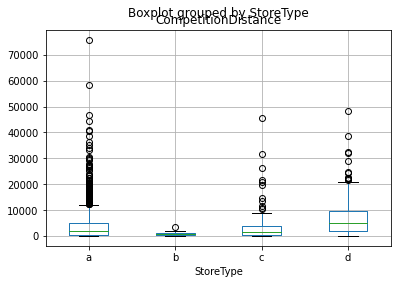

In [316]:
df_store.boxplot(column= "CompetitionDistance", by = "StoreType")
plt.show()

En este grafico se puede observar que los valores que mas se alejan de los demas datos correspondes al tipo de tienda "a"

In [317]:
media_por_tipo = df_store.groupby("StoreType")["CompetitionDistance"].mean()
media_por_tipo

StoreType
a    5123.061564
b    1060.588235
c    3522.567568
d    6913.063584
Name: CompetitionDistance, dtype: float64

In [318]:
cantidad_por_tipo = df_store.groupby("StoreType")["CompetitionDistance"].count()
cantidad_por_tipo

StoreType
a    601
b     17
c    148
d    346
Name: CompetitionDistance, dtype: int64

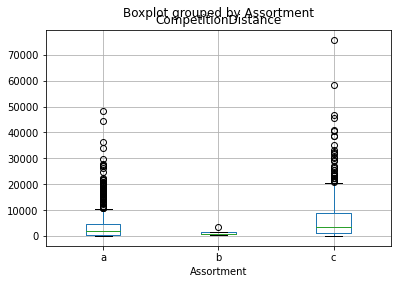

In [319]:
df_store.boxplot(column= "CompetitionDistance", by = "Assortment")
plt.show()

En este grafico se puede observar que los valores que mas se alejan de los demas datos correspondes a la variedad de producto "c"

In [320]:
media_por_variedad = df_store.groupby("Assortment")["CompetitionDistance"].mean()
media_por_variedad

Assortment
a    4400.338409
b    1177.777778
c    6638.769531
Name: CompetitionDistance, dtype: float64

In [321]:
cantidad_por_variedad = df_store.groupby("Assortment")["CompetitionDistance"].count()
cantidad_por_variedad

Assortment
a    591
b      9
c    512
Name: CompetitionDistance, dtype: int64

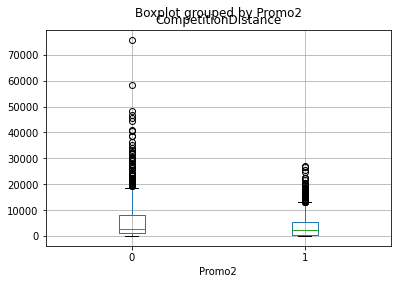

In [322]:
df_store.boxplot(column= "CompetitionDistance", by = "Promo2")
plt.show()

En este grafico se puede observar que los valores que mas se alejan de los demas datos correspondes a las tiendas que no tienen promocion

In [323]:
media_por_promo = df_store.groupby("Promo2")["CompetitionDistance"].mean()
media_por_promo

Promo2
0    6549.520295
1    4316.508772
Name: CompetitionDistance, dtype: float64

In [324]:
cantidad_por_promo = df_store.groupby("Promo2")["CompetitionDistance"].count()
cantidad_por_promo

Promo2
0    542
1    570
Name: CompetitionDistance, dtype: int64

In [325]:
df_store.apply(lambda x: sum(x.isnull()),axis=0) 

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

Se sabe que hay solo hay valores nulos el la columna "CompetitionDistance", los cuales son tres. Para saber que hacer con ellos se analizaran los datos de las otras columnas

In [326]:
nulos = df_store[df_store["CompetitionDistance"].isnull()]
display(nulos)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
290,291,d,a,NaN,0
621,622,a,c,NaN,0
878,879,d,a,NaN,1


De https://datatofish.com/rows-with-nan-pandas-dataframe/

Los tipos de tienda de las filas con valores nulos son "a" y "d", que tienen medias de 5123,06 y 6913,06, respectivamente, que no estan muy lejos de 5404,9, la media al tener en cuenta todos los datos. Las variedades de estas filas son "a" y "c", con medias de 4400,34 y 6638,77, respectivamente, y a dos tiendas que no tienen promocion y una que si, con medias 6549,52 y 4316,51, respectivamente. Todos estos valores estan cerca de la media total, por lo tanto, los valores nulos seran reemplazados por la media total. 

In [327]:
df_store["CompetitionDistance"].fillna(df_store["CompetitionDistance"].mean(), inplace=True)
df_store.apply(lambda x: sum(x.isnull()),axis=0) 

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

Para los outliers, usara una aproximacion logaritmica para anular su efecto, y, asi no se perderan datos para el siguiente paso del problema.

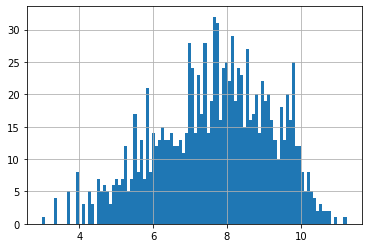

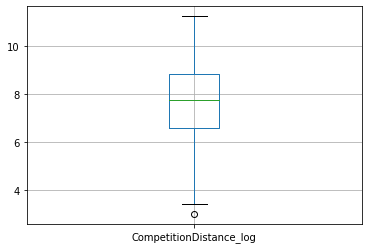

In [328]:
df_store["CompetitionDistance_log"] = np.log(df_store["CompetitionDistance"])
df_store["CompetitionDistance_log"].hist(bins=100)
plt.show()
df_store.boxplot(column = "CompetitionDistance_log")
plt.show()

In [329]:
display(df_store)

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionDistance_log
0,1,c,a,1270.0,0,7.146772
1,2,a,a,570.0,1,6.345636
2,3,a,a,14130.0,1,9.556055
3,4,c,c,620.0,0,6.429719
4,5,a,a,29910.0,0,10.305948
...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,7.549609
1111,1112,c,c,1880.0,0,7.539027
1112,1113,a,c,9260.0,0,9.133459
1113,1114,a,c,870.0,0,6.768493


#### Sales

In [330]:
df_sales = pd.read_csv("sales_data.csv", index_col = 0)
display(df_sales)

,Store,Sales,Customers,Date
0,1,5263,555,2015-07-31
1,2,6064,625,2015-07-31
2,3,8314,821,2015-07-31
3,4,13995,1498,2015-07-31
4,5,4822,559,2015-07-31
...,...,...,...,...
1017204,1111,0,0,2013-01-01
1017205,1112,0,0,2013-01-01
1017206,1113,0,0,2013-01-01
1017207,1114,0,0,2013-01-01


In [331]:
df_sales.dtypes

Store         int64
Sales         int64
Customers     int64
Date         object
dtype: object

Se puede notar que Store, Sales y Customers tienen datos de tipo enteros y Date son objetos.
De  https://aprendeia.com/explorando-los-datos-con-python/ 

In [332]:
df_sales.describe()

,Store,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02
std,3.219087e+02,3.849926e+03,4.644117e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03


Sales: El minimo de las ventas es 0 y el maximo 41551, mientras que el 75% de los datos esta entre 3727 y 7856, por lo otanto, probablemente hayan outliers
Customers: El minimo de clientes es 0 y el maximo 7388, mientras que el 75% de los datos esta entre 405 y 837, por lo otanto, probablemente hayan outliers

In [333]:
df_sales.apply(lambda x: sum(x.isnull()),axis=0) 

Store        0
Sales        0
Customers    0
Date         0
dtype: int64

Se puede notar que no hay valores nulos 

In [334]:
date_sales = df_sales["Date"]
date_sales.value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

El data frame tiene 1017209 filas, mientras que solo hay 942 fechas diferentes, por lo tanto estas se repiten.

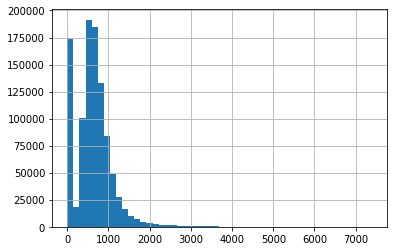

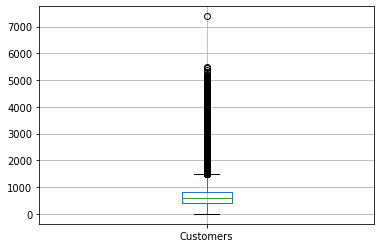

In [335]:
df_sales["Customers"].hist(bins=50)
plt.show()
df_sales.boxplot(column = "Customers")
plt.show()

Al ver la distribucion de la cantidad de clientas, se nota que hay un punto que se aleja en una gran cantidad de los demas valores. Como la cantidad de datos es muy alta, la fila con este dato se eliminara, y su efecto sera casi nulo en el analisis.

In [336]:
df_sales = df_sales.drop(df_sales[df_sales["Customers"] > 6000].index)

De: http://exponentis.es/como-eliminar-filas-de-un-dataframe-de-python-pandas-segun-una-condicion

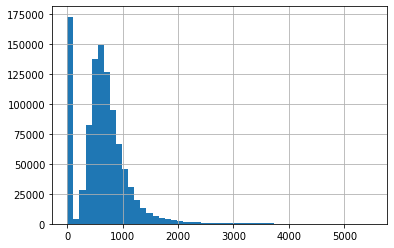

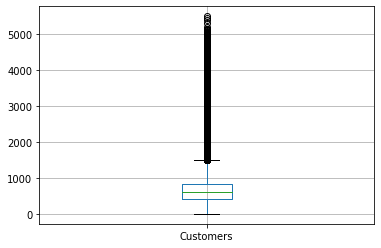

In [337]:
df_sales["Customers"].hist(bins=50)
plt.show()
df_sales.boxplot(column = "Customers")
plt.show()

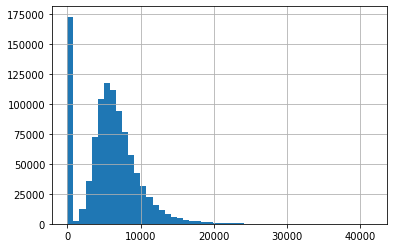

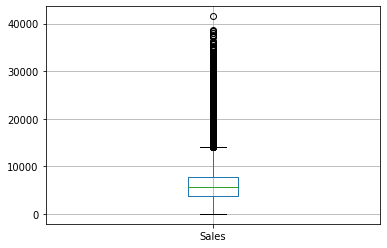

In [338]:
df_sales["Sales"].hist(bins=50)
plt.show()
df_sales.boxplot(column = "Sales")
plt.show()

Al ver la distribucion de la cantidad de ventas, tambien se nota que hay un punto que se aleja en una gran cantidad de los demas valores. Por la misma razon anterior, la fila con este dato se eliminara, y su efecto sera casi nulo en el analisis.

In [339]:
df_sales = df_sales.drop(df_sales[df_sales["Sales"] > 40000].index)

De: http://exponentis.es/como-eliminar-filas-de-un-dataframe-de-python-pandas-segun-una-condicion

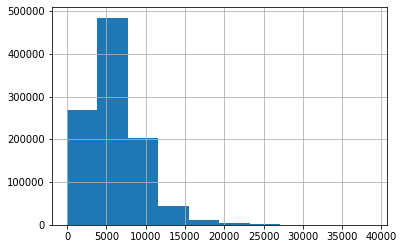

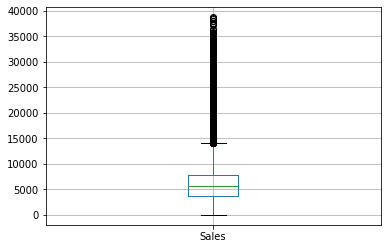

In [340]:
df_sales["Sales"].hist(bins=10)
plt.show()
df_sales.boxplot(column = "Sales")
plt.show()

In [341]:
display(df_sales)

,Store,Sales,Customers,Date
0,1,5263,555,2015-07-31
1,2,6064,625,2015-07-31
2,3,8314,821,2015-07-31
3,4,13995,1498,2015-07-31
4,5,4822,559,2015-07-31
...,...,...,...,...
1017204,1111,0,0,2013-01-01
1017205,1112,0,0,2013-01-01
1017206,1113,0,0,2013-01-01
1017207,1114,0,0,2013-01-01


### 3.2 Generar Dataframe para la predicción

Se necesitaran las siguientes librerias y funciones.

In [342]:
!pip3 install sklearn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip


In [343]:
from sklearn.model_selection import train_test_split #Importacion de train_test_split de sklearn.model_selection. Se usa para dividir un dataset en dos bloques.

In [344]:
df_sales_por_tienda = df_sales.groupby("Store")["Sales", "Customers"].mean()
display(df_sales_por_tienda)
"""
Se crea una tabla con columnas Store, Sales y Customers, pero, para cada tienda, da la media de los datos, asi, se podra agregar a la tabla de "store", ya que tendran la misma cantidad de datos
"""

/var/folders/48/wkr0wgfs17l214pnqtqh2yl80000gn/T/ipykernel_66449/1339784297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sales_por_tienda = df_sales.groupby("Store")["Sales", "Customers"].mean()


,Sales,Customers
Store,,
1,3945.704883,467.646497
2,4122.991507,486.045648
3,5741.253715,620.286624
4,8021.769639,1100.057325
5,3867.110403,444.360934
...,...,...
1111,4342.968153,373.548832
1112,8465.280255,693.498938
1113,5516.180467,596.763270


'\nSe crea una tabla con columnas Store, Sales y Customers, pero, para cada tienda, da la media de los datos, asi, se podra agregar a la tabla de "store", ya que tendran la misma cantidad de datos\n'

In [345]:
mayor_fecha_por_tienda = df_sales.loc[df_sales.groupby(["Store"])["Sales"].idxmax()].reset_index(drop = True)
mayor_fecha_por_tienda = mayor_fecha_por_tienda.drop(["Sales", "Customers"], axis = 1)
display(mayor_fecha_por_tienda)
"""
Cada tienda vende en mas de una fecha, porlo tanto, la fecha que se mostrara sera la que mas se repite por tienda
"""

,Store,Date
0,1,2013-12-23
1,2,2014-06-30
2,3,2014-06-30
3,4,2013-12-30
4,5,2013-12-16
...,...,...
1110,1111,2013-12-16
1111,1112,2013-01-07
1112,1113,2013-12-23
1113,1114,2013-12-23


'\nCada tienda vende en mas de una fecha, porlo tanto, la fecha que se mostrara sera la que mas se repite por tienda\n'

In [346]:
df_sales_por_tienda = pd.merge(df_sales_por_tienda, mayor_fecha_por_tienda, on = "Store")
display(df_sales_por_tienda)

,Store,Sales,Customers,Date
0,1,3945.704883,467.646497,2013-12-23
1,2,4122.991507,486.045648,2014-06-30
2,3,5741.253715,620.286624,2014-06-30
3,4,8021.769639,1100.057325,2013-12-30
4,5,3867.110403,444.360934,2013-12-16
...,...,...,...,...
1110,1111,4342.968153,373.548832,2013-12-16
1111,1112,8465.280255,693.498938,2013-01-07
1112,1113,5516.180467,596.763270,2013-12-23
1113,1114,17200.196391,2664.057325,2013-12-23


De: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [347]:
df = pd.merge(df_store, df_sales_por_tienda, on = "Store")
display(df)

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionDistance_log,Sales,Customers,Date
0,1,c,a,1270.0,0,7.146772,3945.704883,467.646497,2013-12-23
1,2,a,a,570.0,1,6.345636,4122.991507,486.045648,2014-06-30
2,3,a,a,14130.0,1,9.556055,5741.253715,620.286624,2014-06-30
3,4,c,c,620.0,0,6.429719,8021.769639,1100.057325,2013-12-30
4,5,a,a,29910.0,0,10.305948,3867.110403,444.360934,2013-12-16
...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,7.549609,4342.968153,373.548832,2013-12-16
1111,1112,c,c,1880.0,0,7.539027,8465.280255,693.498938,2013-01-07
1112,1113,a,c,9260.0,0,9.133459,5516.180467,596.763270,2013-12-23
1113,1114,a,c,870.0,0,6.768493,17200.196391,2664.057325,2013-12-23


De: https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

In [348]:
df_p2 = df.copy()
display(df_p2)
"""
Puesto que para las misiones que quedan se usara el Dataframe anterior, se creara una copia en cada mision para dejar intacto el original
"""

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionDistance_log,Sales,Customers,Date
0,1,c,a,1270.0,0,7.146772,3945.704883,467.646497,2013-12-23
1,2,a,a,570.0,1,6.345636,4122.991507,486.045648,2014-06-30
2,3,a,a,14130.0,1,9.556055,5741.253715,620.286624,2014-06-30
3,4,c,c,620.0,0,6.429719,8021.769639,1100.057325,2013-12-30
4,5,a,a,29910.0,0,10.305948,3867.110403,444.360934,2013-12-16
...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,7.549609,4342.968153,373.548832,2013-12-16
1111,1112,c,c,1880.0,0,7.539027,8465.280255,693.498938,2013-01-07
1112,1113,a,c,9260.0,0,9.133459,5516.180467,596.763270,2013-12-23
1113,1114,a,c,870.0,0,6.768493,17200.196391,2664.057325,2013-12-23


'\nPuesto que para las misiones que quedan se usara el Dataframe anterior, se creara una copia en cada mision para dejar intacto el original\n'

In [349]:
training_set, test_set = train_test_split(df_p2.copy(), test_size = 0.2)
display(training_set)
display(test_set)
print(f'Tamaño set entrenamiento: {len(training_set)}')
print(f'Tamaño set test: {len(test_set)}')
"""
Se crea el set de entrenamiento y el de prueba, con razon 80 a 20
"""

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionDistance_log,Sales,Customers,Date
24,25,c,a,430.0,0,6.063785,8892.311040,1250.288747,2014-02-14
1096,1097,b,b,720.0,0,6.579251,9744.599788,2420.921444,2015-05-01
467,468,c,c,5260.0,0,8.567886,5550.970276,628.019108,2013-12-23
917,918,a,c,18710.0,0,9.836813,4295.193206,457.851380,2013-12-23
504,505,a,a,350.0,1,5.857933,3939.670913,490.459660,2014-12-15
...,...,...,...,...,...,...,...,...,...
0,1,c,a,1270.0,0,7.146772,3945.704883,467.646497,2013-12-23
123,124,a,a,1410.0,0,7.251345,3658.609342,434.720807,2013-05-31
815,816,c,c,460.0,0,6.131226,4244.869427,614.125265,2013-05-31
65,66,d,a,7660.0,1,8.943767,5043.373673,432.263270,2013-12-23


,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionDistance_log,Sales,Customers,Date
38,39,a,a,260.0,1,5.560682,4012.901274,520.669851,2015-04-30
411,412,d,c,4460.0,1,8.402904,7469.023747,529.040897,2015-05-02
285,286,a,a,1460.0,0,7.286192,4075.129512,355.971338,2013-12-16
689,690,a,a,100.0,0,4.605170,4622.717622,655.080679,2013-11-18
442,443,d,a,11400.0,0,9.341369,4348.041401,404.784501,2013-12-16
...,...,...,...,...,...,...,...,...,...
539,540,d,c,810.0,1,6.697034,4635.451187,321.102902,2014-06-30
775,776,c,a,700.0,1,6.551080,3958.099788,440.366242,2014-06-30
401,402,c,c,5830.0,1,8.670772,4850.565817,509.589172,2013-12-23
535,536,a,c,4700.0,1,8.455318,6883.328025,730.237792,2013-12-16


Tamaño set entrenamiento: 892
Tamaño set test: 223


'\nSe crea el set de entrenamiento y el de prueba, con razon 80 a 20\n'

### Clasificación: Predecir StoreType

In [350]:
!pip3 install seaborn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip


In [351]:
from sklearn.decomposition import PCA #Importacion de PCA de sklearn.decomposition. Se usa para reducir el número de variables de un conjunto de datos manteniendo la mayoría de la varianza posible
import seaborn as sns #Importacion de la libreria seaborn. Se usa para personalizar graficos.
from sklearn.preprocessing import StandardScaler #Importacion de StandardScaler de sklearn.preprocessing. Se usa para estandarizar datos.
from sklearn import metrics #Importacion de metrics de sklearn. Para medir rendimiento.
from sklearn.metrics import confusion_matrix #Importacion de confusion_matrix de sklearn.metrics. Para crear la matriz de confusion.
from sklearn.tree import DecisionTreeClassifier #Importacion de DecisionTreeClassifier de sklearn.tree. Para medir crear el arbol de clasificacion.
from sklearn.svm import SVC #Importacion de SVC de sklearn.svm. Para crear modelo SVC.
from sklearn.neighbors import KNeighborsClassifier #Importacion de KNeighborsClassifier de sklearn.neighbors. Para crear modelo KNN.

In [352]:
df_p3 = df.copy()
df_p3 = df_p3.drop(["Store", "Assortment", "CompetitionDistance", "Date"], axis = 1)
display(df_p3)
"""
Se crea el data frame para esta parte del problema
"""

,StoreType,Promo2,CompetitionDistance_log,Sales,Customers
0,c,0,7.146772,3945.704883,467.646497
1,a,1,6.345636,4122.991507,486.045648
2,a,1,9.556055,5741.253715,620.286624
3,c,0,6.429719,8021.769639,1100.057325
4,a,0,10.305948,3867.110403,444.360934
...,...,...,...,...,...
1110,a,1,7.549609,4342.968153,373.548832
1111,c,0,7.539027,8465.280255,693.498938
1112,a,0,9.133459,5516.180467,596.763270
1113,a,0,6.768493,17200.196391,2664.057325


'\nSe crea el data frame para esta parte del problema\n'

In [353]:
"""
La primera columna corresponde al tipo de tienda, que es el atributo en torno al cual trabajaremos, por lo que se haran 2 tablas, una con los tipos de tienda y la otra con las demas caracteristicas
"""
store_type = pd.DataFrame(df_p3.iloc[:, 0])
store_type.columns = ["StoreType"]
display(store_type)
df_p3.pop("StoreType") 
display(df_p3)

,StoreType
0,c
1,a
2,a
3,c
4,a
...,...
1110,a
1111,c
1112,a
1113,a


,Promo2,CompetitionDistance_log,Sales,Customers
0,0,7.146772,3945.704883,467.646497
1,1,6.345636,4122.991507,486.045648
2,1,9.556055,5741.253715,620.286624
3,0,6.429719,8021.769639,1100.057325
4,0,10.305948,3867.110403,444.360934
...,...,...,...,...
1110,1,7.549609,4342.968153,373.548832
1111,0,7.539027,8465.280255,693.498938
1112,0,9.133459,5516.180467,596.763270
1113,0,6.768493,17200.196391,2664.057325


In [354]:
df_p3 = df_p3.sub(df_p3.mean(axis=0), axis=1)
display(df_p3)
"""
Se normalizan los datos, asi los resultados son dominados por una sola variable, ya que hay un gran rango de valores de datos
"""

,Promo2,CompetitionDistance_log,Sales,Customers
0,-0.512108,-0.499535,-1817.567953,-161.846493
1,0.487892,-1.300671,-1640.281329,-143.447343
2,0.487892,1.909748,-22.019121,-9.206366
3,-0.512108,-1.216588,2258.496803,470.564335
4,-0.512108,2.659641,-1896.162433,-185.132056
...,...,...,...,...
1110,0.487892,-0.096698,-1420.304683,-255.944158
1111,-0.512108,-0.107280,2702.007419,64.005948
1112,-0.512108,1.487152,-247.092369,-32.729721
1113,-0.512108,-0.877814,11436.923555,2034.564335


'\nSe normalizan los datos, asi los resultados son dominados por una sola variable, ya que hay un gran rango de valores de datos\n'

In [355]:
matriz_df_p3 = np.asmatrix(df_p3)
sigma = np.cov(matriz_df_p3.T)
"""
Se calcula la covarianza para luego calcular los valores y vectores propios. Para esto es necesario primero pasar los datos a una matriz
"""

'\nSe calcula la covarianza para luego calcular los valores y vectores propios. Para esto es necesario primero pasar los datos a una matriz\n'

In [356]:
valores_propios, vectores_propios = np.linalg.eig(sigma)
"""
Se calculan los valores y los vectores propios
"""

'\nSe calculan los valores y los vectores propios\n'

In [357]:
sorted_index = valores_propios.argsort()[::-1] 
valores_propios = valores_propios[sorted_index]
vectores_propios = vectores_propios[:,sorted_index]
"""
Se ordenan los valores propios de mayor a menor, y los vectores propios a partir de la posicion de el valor propio asociado a cada uno. Esto se hace ya que se necesita saber que datos tienen la mayor varianza
""" 


'\nSe ordenan los valores propios de mayor a menor, y los vectores propios a partir de la posicion de el valor propio asociado a cada uno. Esto se hace ya que se necesita saber que datos tienen la mayor varianza\n'

In [358]:
vectores_propios = vectores_propios[:,:2]
"""
Para pasar los datos a 2 dimensiones, se seleccionan los dos primeros valores propios con sus respectivos vectores propios
"""

'\nPara pasar los datos a 2 dimensiones, se seleccionan los dos primeros valores propios con sus respectivos vectores propios\n'

In [359]:
transformada = matriz_df_p3.dot(vectores_propios)
"""
Para transformar el data frame se hace el producto punto entre la matriz del data frame original y los dos vectores propios seleccionados anteriormente
"""

'\nPara transformar el data frame se hace el producto punto entre la matriz del data frame original y los dos vectores propios seleccionados anteriormente\n'

In [360]:
df_final = np.hstack((store_type, transformada))
"""
Se le agrega en la primera columna el tipo de tienda correspondiente a la fila
"""
df_final = pd.DataFrame(df_final)
"""
Se convierte la matriz en un data frame
"""
df_final.columns = ["StoreType", "x", "y"]
display(df_final)
"""
Se definen los nombres para cada columna
"""

,StoreType,x,y
0,c,1823.163318,76.309326
1,a,1644.990553,71.458847
2,a,23.030976,-6.266114
3,c,-2300.551684,172.34261
4,a,1904.121728,63.450077
...,...,...,...
1110,a,1441.543492,-68.739027
1111,c,-2687.320474,-288.528646
1112,a,249.250584,-0.266848
1113,a,-11604.507217,527.33502


'\nSe definen los nombres para cada columna\n'

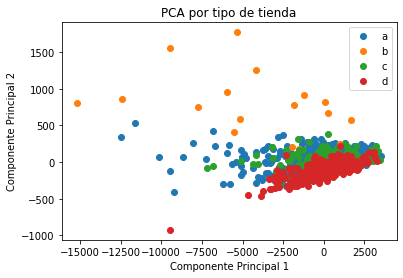

In [361]:
grupos = df_final.groupby("StoreType")
figure, axis = plt.subplots()
axis.margins(0.05)
for tipo, grupo in grupos:
    axis.plot(grupo.x, grupo.y, marker = 'o', linestyle = '', ms = 6, label = tipo)
    axis.set_title("PCA por tipo de tienda")
axis.legend()
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

De: https://code.likeagirl.io/principal-component-analysis-dimensionality-reduction-technique-step-by-step-approach-ffd46623ff67

Para entrenar y evaluer los modelos de clasificacón se usarán los set de entrenamiento y prueba creados en la misión anterior, pero se modificarán dejandolos solo con las columnas usadas en esta misión.

In [362]:
training_set3 = training_set.copy()
training_set3 = training_set3.drop(["Store", "Assortment", "CompetitionDistance", "Date"], axis = 1)
test_set3 = test_set.copy()
test_set3 = test_set3.drop(["Store", "Assortment", "CompetitionDistance", "Date"], axis = 1)
display(training_set3)
display(test_set3)

,StoreType,Promo2,CompetitionDistance_log,Sales,Customers
24,c,0,6.063785,8892.311040,1250.288747
1096,b,0,6.579251,9744.599788,2420.921444
467,c,0,8.567886,5550.970276,628.019108
917,a,0,9.836813,4295.193206,457.851380
504,a,1,5.857933,3939.670913,490.459660
...,...,...,...,...,...
0,c,0,7.146772,3945.704883,467.646497
123,a,0,7.251345,3658.609342,434.720807
815,c,0,6.131226,4244.869427,614.125265
65,d,1,8.943767,5043.373673,432.263270


,StoreType,Promo2,CompetitionDistance_log,Sales,Customers
38,a,1,5.560682,4012.901274,520.669851
411,d,1,8.402904,7469.023747,529.040897
285,a,0,7.286192,4075.129512,355.971338
689,a,0,4.605170,4622.717622,655.080679
442,d,0,9.341369,4348.041401,404.784501
...,...,...,...,...,...
539,d,1,6.697034,4635.451187,321.102902
775,c,1,6.551080,3958.099788,440.366242
401,c,1,8.670772,4850.565817,509.589172
535,a,1,8.455318,6883.328025,730.237792


In [363]:
scaler = StandardScaler()
features3 = ["CompetitionDistance_log","Promo2", "Sales", "Customers"]

training_set3[features3] = scaler.fit_transform(training_set3[features3])
test_set3[features3] = scaler.transform(test_set3[features3])

"""
Se normalizan los datos de cada set, para que todos esten en la misma escala
"""


'\nSe normalizan los datos de cada set, para que todos esten en la misma escala\n'

In [364]:
def training_and_eval(model, training, eval, features, target):
    model.fit(training[features3], training[target])
    predictions = model.predict(training[features3])
    accuracy = metrics.accuracy_score(predictions, training[target])
    print(f"Accuracy training_set: {accuracy: .2}")
    predictions = model.predict(eval[features3])
    accuracy = metrics.accuracy_score(predictions, eval[target])
    print(f"Accuracy test_set: {accuracy: .2}")
    matriz = confusion_matrix(eval["StoreType"], predictions)
    print(matriz)
    sns.heatmap(matriz, annot=True)
"""
Esta funcion realiza el entrenamiento entrenamiento y la evaluacion de rendimiento en un set separado, para cualqueir modelo que se le entregue como parámetro.
"""

'\nEsta funcion realiza el entrenamiento entrenamiento y la evaluacion de rendimiento en un set separado, para cualqueir modelo que se le entregue como parámetro.\n'

De https://github.com/IIC2115/Syllabus/blob/main/Material%20de%20clases/Cap%C3%ADtulo%202/Parte%20B/Notebooks%20Ejemplo/01%20-%20Modelos%20predictivos%20de%20aprendizaje%20de%20m%C3%A1quina.ipynb

Modelo: Arbol de decisión

Accuracy training_set:  1.0
Accuracy test_set:  0.57
[[82  0 18 27]
 [ 1  3  2  0]
 [17  1  8  2]
 [25  0  3 34]]


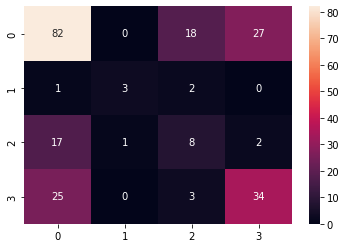

In [365]:
target = "StoreType"
model = DecisionTreeClassifier()
training_and_eval(model, training_set3, test_set3, features3, target)

En este modelo, al evaluar el training set, tienen una exactitud del 100%, mientras que el de prueba de 57%. Esto se puede deber a que los datos de prueba son datos nuevos.

Modelo: SVC

Accuracy training_set:  0.68
Accuracy test_set:  0.69
[[108   0   0  19]
 [  4   2   0   0]
 [ 25   0   0   3]
 [ 18   0   0  44]]


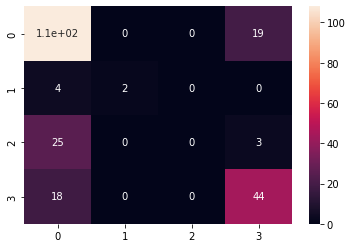

In [366]:
model = SVC()
training_and_eval(model, training_set3, test_set3, features3, target)

En este modelo, al evaluar el training set y el set de prueba, se tienen exactitudes similares, de 68% y 69%, respectivamente.

Modelo: KNN

Accuracy training_set:  0.7
Accuracy test_set:  0.61
[[100   0   5  22]
 [  5   1   0   0]
 [ 21   0   3   4]
 [ 26   0   4  32]]


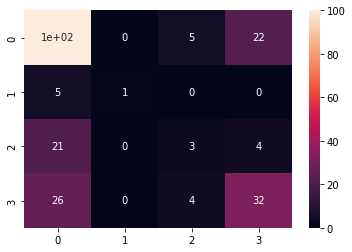

In [367]:
model = KNeighborsClassifier()
training_and_eval(model, training_set3, test_set3, features3, target)

En este modelo, al evaluar el training set, tienen una exactitud del 70%, mientras que el de prueba de 61%. Que no son tan distintas

El modelo que tiene mejor rendimiento es el SVC, puesto que es el que las exactitudes del set de prueba y de entrenamiento son mas similares, y, ademas, teniendo en cuenta las dos, son las mas altas.

### Resgresión: predecir Sales

In [368]:
from sklearn.preprocessing import LabelEncoder #Se importa LabelEncoder de sklearn.preprocessing, la cual  codifica etiquetas de una característica categórica en valores numéricos entre 0 y el número de clases menos 1.
from sklearn.linear_model import LinearRegression #Se importa LinearRegression de sklearn.linear_model. Para crear el modelo de regresion lineal.
from sklearn.tree import DecisionTreeRegressor #Se importa DecisionTreeRegressor de sklearn.tree. Para crear el modelo de arbol de regresion.
from sklearn.ensemble import RandomForestRegressor #Se importa RandomForestRegressor de sklearn.ensemble. Para crear el modelo de RFR.



In [369]:
df_p4 = df.copy()
df_p4 = df_p4.drop(["Store", "CompetitionDistance", "Date"], axis = 1)
display(df_p4)

,StoreType,Assortment,Promo2,CompetitionDistance_log,Sales,Customers
0,c,a,0,7.146772,3945.704883,467.646497
1,a,a,1,6.345636,4122.991507,486.045648
2,a,a,1,9.556055,5741.253715,620.286624
3,c,c,0,6.429719,8021.769639,1100.057325
4,a,a,0,10.305948,3867.110403,444.360934
...,...,...,...,...,...,...
1110,a,a,1,7.549609,4342.968153,373.548832
1111,c,c,0,7.539027,8465.280255,693.498938
1112,a,c,0,9.133459,5516.180467,596.763270
1113,a,c,0,6.768493,17200.196391,2664.057325


El metodo que se utilizara sera convertir las variables categoricas a numeros, puesto que, para mi, es la opcion mas simple y con menos probabilidad de comete errores en el analisis, ya que los datos quedan practicamente iguales, solo que con numeros en lugar de letras para esos datos.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [370]:
variables_categoricas = ["StoreType"]
label_encoder = LabelEncoder()
for i in variables_categoricas:
    df_p4[i] = label_encoder.fit_transform(df_p4[i])
"""
Se le asigna un numero diferente a cada variable en la columna StoreType y se cambia la variable al numero asociado.
"""
"""
Luago se hace lo mismo para la otra columna con variables categoricas, Assortment
"""
variables_categoricas = ["Assortment"]
label_encoder = LabelEncoder()
for i in variables_categoricas:
    df_p4[i] = label_encoder.fit_transform(df_p4[i])
df_p4.dtypes 

StoreType                    int64
Assortment                   int64
Promo2                       int64
CompetitionDistance_log    float64
Sales                      float64
Customers                  float64
dtype: object

In [371]:
display(df_p4)

,StoreType,Assortment,Promo2,CompetitionDistance_log,Sales,Customers
0,2,0,0,7.146772,3945.704883,467.646497
1,0,0,1,6.345636,4122.991507,486.045648
2,0,0,1,9.556055,5741.253715,620.286624
3,2,2,0,6.429719,8021.769639,1100.057325
4,0,0,0,10.305948,3867.110403,444.360934
...,...,...,...,...,...,...
1110,0,0,1,7.549609,4342.968153,373.548832
1111,2,2,0,7.539027,8465.280255,693.498938
1112,0,2,0,9.133459,5516.180467,596.763270
1113,0,2,0,6.768493,17200.196391,2664.057325


Para crear los sets de entrenamiento y prueba para esta mision, se usaran los sets creados en la misión 3.2, pero se le quitaran las columnas que no seran usadas en esta misión.

In [372]:
training_set4 = training_set.copy()
training_set4 = training_set4.drop(["Store", "CompetitionDistance", "Date"], axis = 1)
test_set4 = test_set.copy()
test_set4 = test_set4.drop(["Store", "CompetitionDistance", "Date"], axis = 1)

In [373]:
variables_categoricas = ["StoreType"]
label_encoder = LabelEncoder()
for i in variables_categoricas:
    training_set4[i] = label_encoder.fit_transform(training_set4[i])
    test_set4[i] = label_encoder.fit_transform(test_set4[i])

variables_categoricas = ["Assortment"]
label_encoder = LabelEncoder()
for i in variables_categoricas:
    training_set4[i] = label_encoder.fit_transform(training_set4[i])
    test_set4[i] = label_encoder.fit_transform(test_set4[i])


display(training_set4.dtypes) 
display(test_set4.dtypes)

StoreType                    int64
Assortment                   int64
Promo2                       int64
CompetitionDistance_log    float64
Sales                      float64
Customers                  float64
dtype: object

StoreType                    int64
Assortment                   int64
Promo2                       int64
CompetitionDistance_log    float64
Sales                      float64
Customers                  float64
dtype: object

In [374]:
features = ["StoreType", "Assortment", "Promo2", "CompetitionDistance_log", "Customers"]
target = "Sales"

In [375]:
x_train, y_train = training_set4[features], training_set4[target]
x_test, y_test = test_set4[features], test_set4[target]

In [376]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [377]:
def training_and_eval(model, x_train, y_train, x_test, y_test, transform=None):
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    if transform is not None:
        train_pred = transform(train_pred)
        test_pred = transform(test_pred)

    train_mse = metrics.mean_squared_error(y_train, train_pred)
    test_mse = metrics.mean_squared_error(y_test, test_pred)
    print(f"Train MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}")

Modelo: Regresión Lineal

In [378]:
lr_model = LinearRegression()
training_and_eval(lr_model, x_train, y_train, x_test, y_test)

Train MSE: 1085435.47
Test MSE: 928143.53


El MSE del set de entrenamiento es 1085435.47, mientras que en del set de prueba es 928143.53. Se puede notar que el set de prueba tiene menor MSE. La diferencia entre los MSE es 157291.94.

Modelo: Arbol de Regresión

In [379]:
dtr_model = DecisionTreeRegressor()
training_and_eval(dtr_model, x_train, y_train, x_test, y_test)

Train MSE: 0.00
Test MSE: 1481869.57


El MSE del set de entrenamiento es 0, por lo tanto este modelo no tiene error para el set de entrenamiento, mientras que en del set de prueba es 1481869.57. Se puede notar que el set de entrenamiento tiene menor MSE. La diferencia entre los MSE es 1481869.57.

Modelo: RFR

In [380]:
rfr_model = RandomForestRegressor()
training_and_eval(rfr_model, x_train, y_train, x_test, y_test)

Train MSE: 140538.34
Test MSE: 764555.47


El MSE del set de entrenamiento es 140538.34, mientras que en del set de prueba es 764555.47. Se puede notar que el set de entrenamiento tiene menor MSE. La diferencia entre los MSE es 624017,13.

El menor MSE de los test de prueba es el modelo de RFR, el cual tiene una diferencia de 764555.47 entre MSEs. Aun que no sea el que menos diferencia tiene entre MSEs, por la razon anterior, es el que tiene mejor rendimiento.

De: https://github.com/IIC2115/Syllabus-2021-2/blob/main/Ayudant%C3%ADas/T4b/T4b_pauta.ipynb